In [38]:
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")

## 線型回帰を解いてみる

$$
\begin{aligned}
Y &= \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \epsilon \\
\epsilon & \sim  N(0,\sigma^2)
\end{aligned}
$$

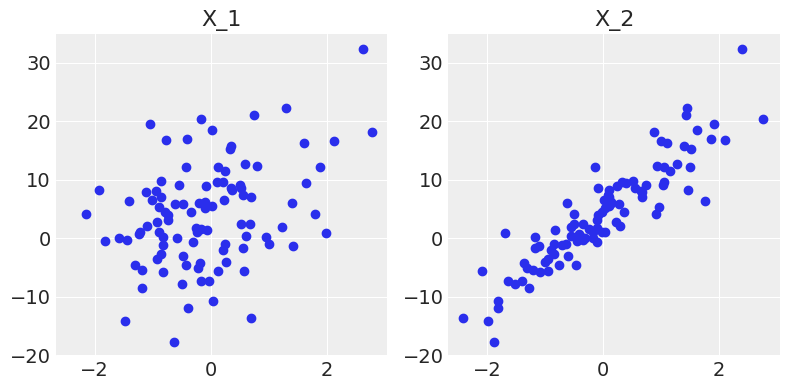

In [35]:
# 真のパラメータの設定
beta = [5,3,7]
sigma = 2.5

# 観測データの生成
sample_size = 100
X = np.ones([sample_size,3])
X[:,1] = np.random.randn(sample_size)
X[:,2] = np.random.randn(sample_size)
error = np.random.normal(loc = 0, scale=sigma, size=sample_size)
Y = np.sum(X*beta,axis=1) + error

# 可視化
fig, axes = plt.subplots(
    1,
    2,
    figsize = [8,4],
    sharex=True,
    tight_layout = True,
)

for i,ax in enumerate(axes):
    ax.scatter(X[:,i+1],Y)
    ax.set_title(f"X_{i+1:.0f}")

## モデル作成

推定したいパラメータは$\beta_0$, $\beta_1$, $\beta_2$, $\sigma$  
それぞれ弱情報事前分布として、$\beta_2$は$N(0,100)$を、$\sigma$は$HalfNorm(0,100)$設定する。

In [36]:
import pymc as pm
print(f"Running on PyMC v{pm.__version__}")

Running on PyMC v5.20.0


Initializing NUTS using jitter+adapt_diag...


CPU times: user 2 μs, sys: 1 μs, total: 3 μs
Wall time: 2.15 μs


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, sigma]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta[0],4.49,0.25,4.00,4.95,0.0,0.0,6644.73,3422.86,1.0
beta[1],2.72,0.24,2.26,3.18,0.0,0.0,5180.64,3203.16,1.0
beta[2],7.20,0.23,6.76,7.62,0.0,0.0,6265.05,3181.24,1.0
sigma,2.45,0.18,2.11,2.78,0.0,0.0,6440.40,3356.18,1.0


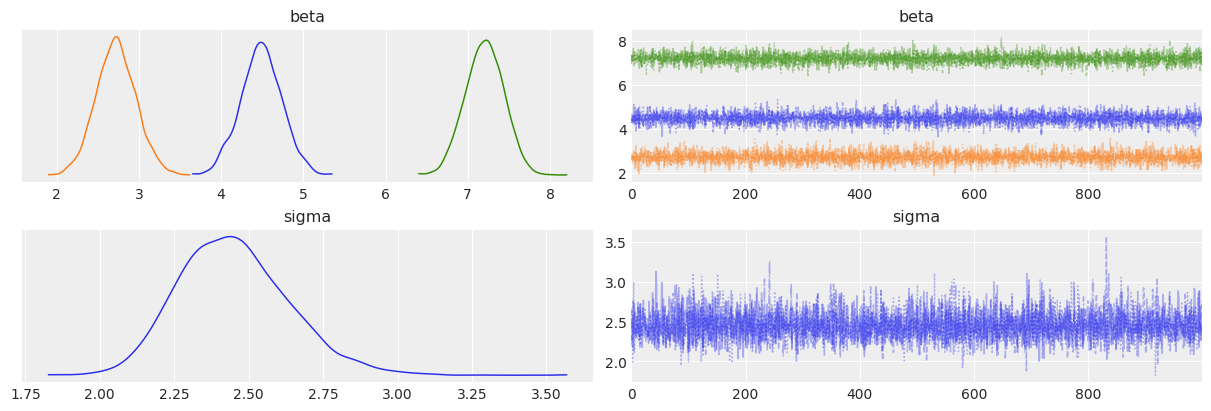

In [54]:
with pm.Model() as basic_model:
    # 事前分布
    beta = pm.Normal("beta",mu=0,sigma=100,shape=3)
    sigma = pm.HalfNormal('sigma',sigma=100,)
    # モデル式
    mu=beta[0]*X[:,0] + beta[1]*X[:,1] + beta[2]*X[:,2]
    # mu=np.sum(beta*X,axis=1)
    y_pred = pm.Normal("y_pred",mu=mu,sigma=sigma,observed=Y)
with basic_model:
    trace = pm.sample()
az.plot_trace(trace, combined=True)
az.summary(trace, round_to=2)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, sigma]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta[0],4.49,0.25,4.02,4.94,0.0,0.0,5048.49,3228.95,1.0
beta[1],2.71,0.25,2.21,3.16,0.0,0.0,5332.09,3212.34,1.0
beta[2],7.21,0.22,6.77,7.61,0.0,0.0,6069.72,2658.23,1.0
sigma,2.45,0.18,2.15,2.80,0.0,0.0,5465.76,3451.53,1.0


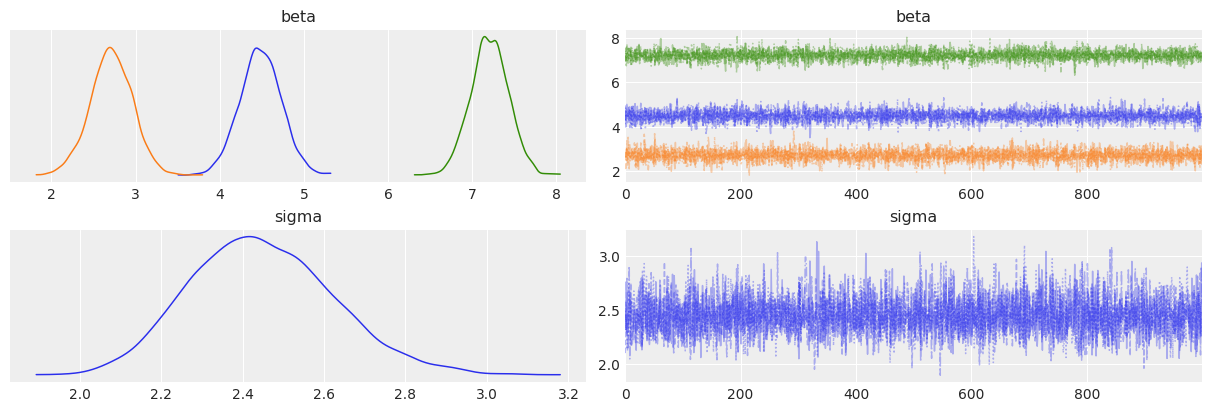

In [62]:
with pm.Model() as basic_model:
    # 事前分布
    beta = pm.Normal("beta",mu=0,sigma=10,shape=3)
    sigma = pm.HalfNormal('sigma',sigma=10,)
    # モデル式
    mu=beta[0]*X[:,0] + beta[1]*X[:,1] + beta[2]*X[:,2]
    # mu=np.sum(beta*X,axis=1)
    y_pred = pm.Normal("y_pred",mu=mu,sigma=sigma,observed=Y)
with basic_model:
    trace = pm.sample(draws=1000,tune=1000)
az.plot_trace(trace, combined=True)
az.summary(trace, round_to=2)